In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [10]:
Data1= pd.read_csv(r'C:\Users\Appsysm-3\Downloads\Company_Data.csv')
Data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [23]:
numeric_data = Data1.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

C:\Users\Appsysm-3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Appsysm-3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Appsysm-3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Appsysm-3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

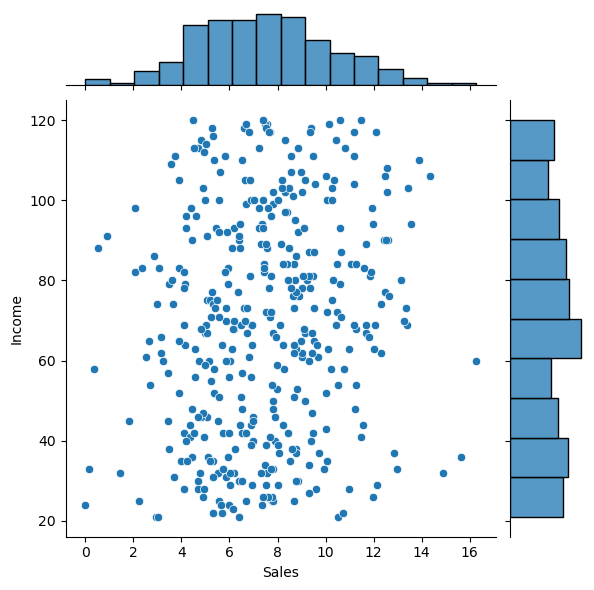

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x='Sales', y='Income', data=Data1)
plt.show()

In [28]:
Data1.loc[Data1["Sales"] <= 10.00,"Sales1"]="Not High"
Data1.loc[Data1["Sales"] >= 10.01,"Sales1"]="High"

In [29]:
Data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Not High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Not High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Not High
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Not High
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Not High
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Not High


# Label Encoding

In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [31]:
Data1["ShelveLoc"] = label_encoder.fit_transform(Data1["ShelveLoc"])
Data1["Urban"] = label_encoder.fit_transform(Data1["Urban"])
Data1["US"] = label_encoder.fit_transform(Data1["US"])
Data1["Sales1"] = label_encoder.fit_transform(Data1["Sales1"])

In [32]:
Data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [33]:
# Define x & y
x = Data1.iloc[:,1:11]
y = Data1['Sales1']

In [34]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=50)

# Building Decision Tree Classifier

In [35]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
model.get_n_leaves()

8

In [37]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    70
0    10
Name: count, dtype: int64

In [38]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales1,,
0,7,11
1,3,59


In [40]:
np.mean(preds==y_test)

0.825

In [41]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.39      0.70      0.50        10
           1       0.95      0.84      0.89        70

    accuracy                           0.82        80
   macro avg       0.67      0.77      0.70        80
weighted avg       0.88      0.82      0.84        80



# Building Decision Tree Classifier

In [42]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [43]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
model_gini.get_n_leaves()

8

In [45]:
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

1    68
0    12
Name: count, dtype: int64

In [46]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
np.mean(preds==y_test)

0.8

In [48]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.39      0.58      0.47        12
           1       0.92      0.84      0.88        68

    accuracy                           0.80        80
   macro avg       0.65      0.71      0.67        80
weighted avg       0.84      0.80      0.82        80



# Building Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
model_R = DecisionTreeRegressor()
model_R.fit(x_train, y_train)

DecisionTreeRegressor()

In [51]:
preds = model_R.predict(x_test) 

In [52]:
np.mean(preds==y_test)

0.8

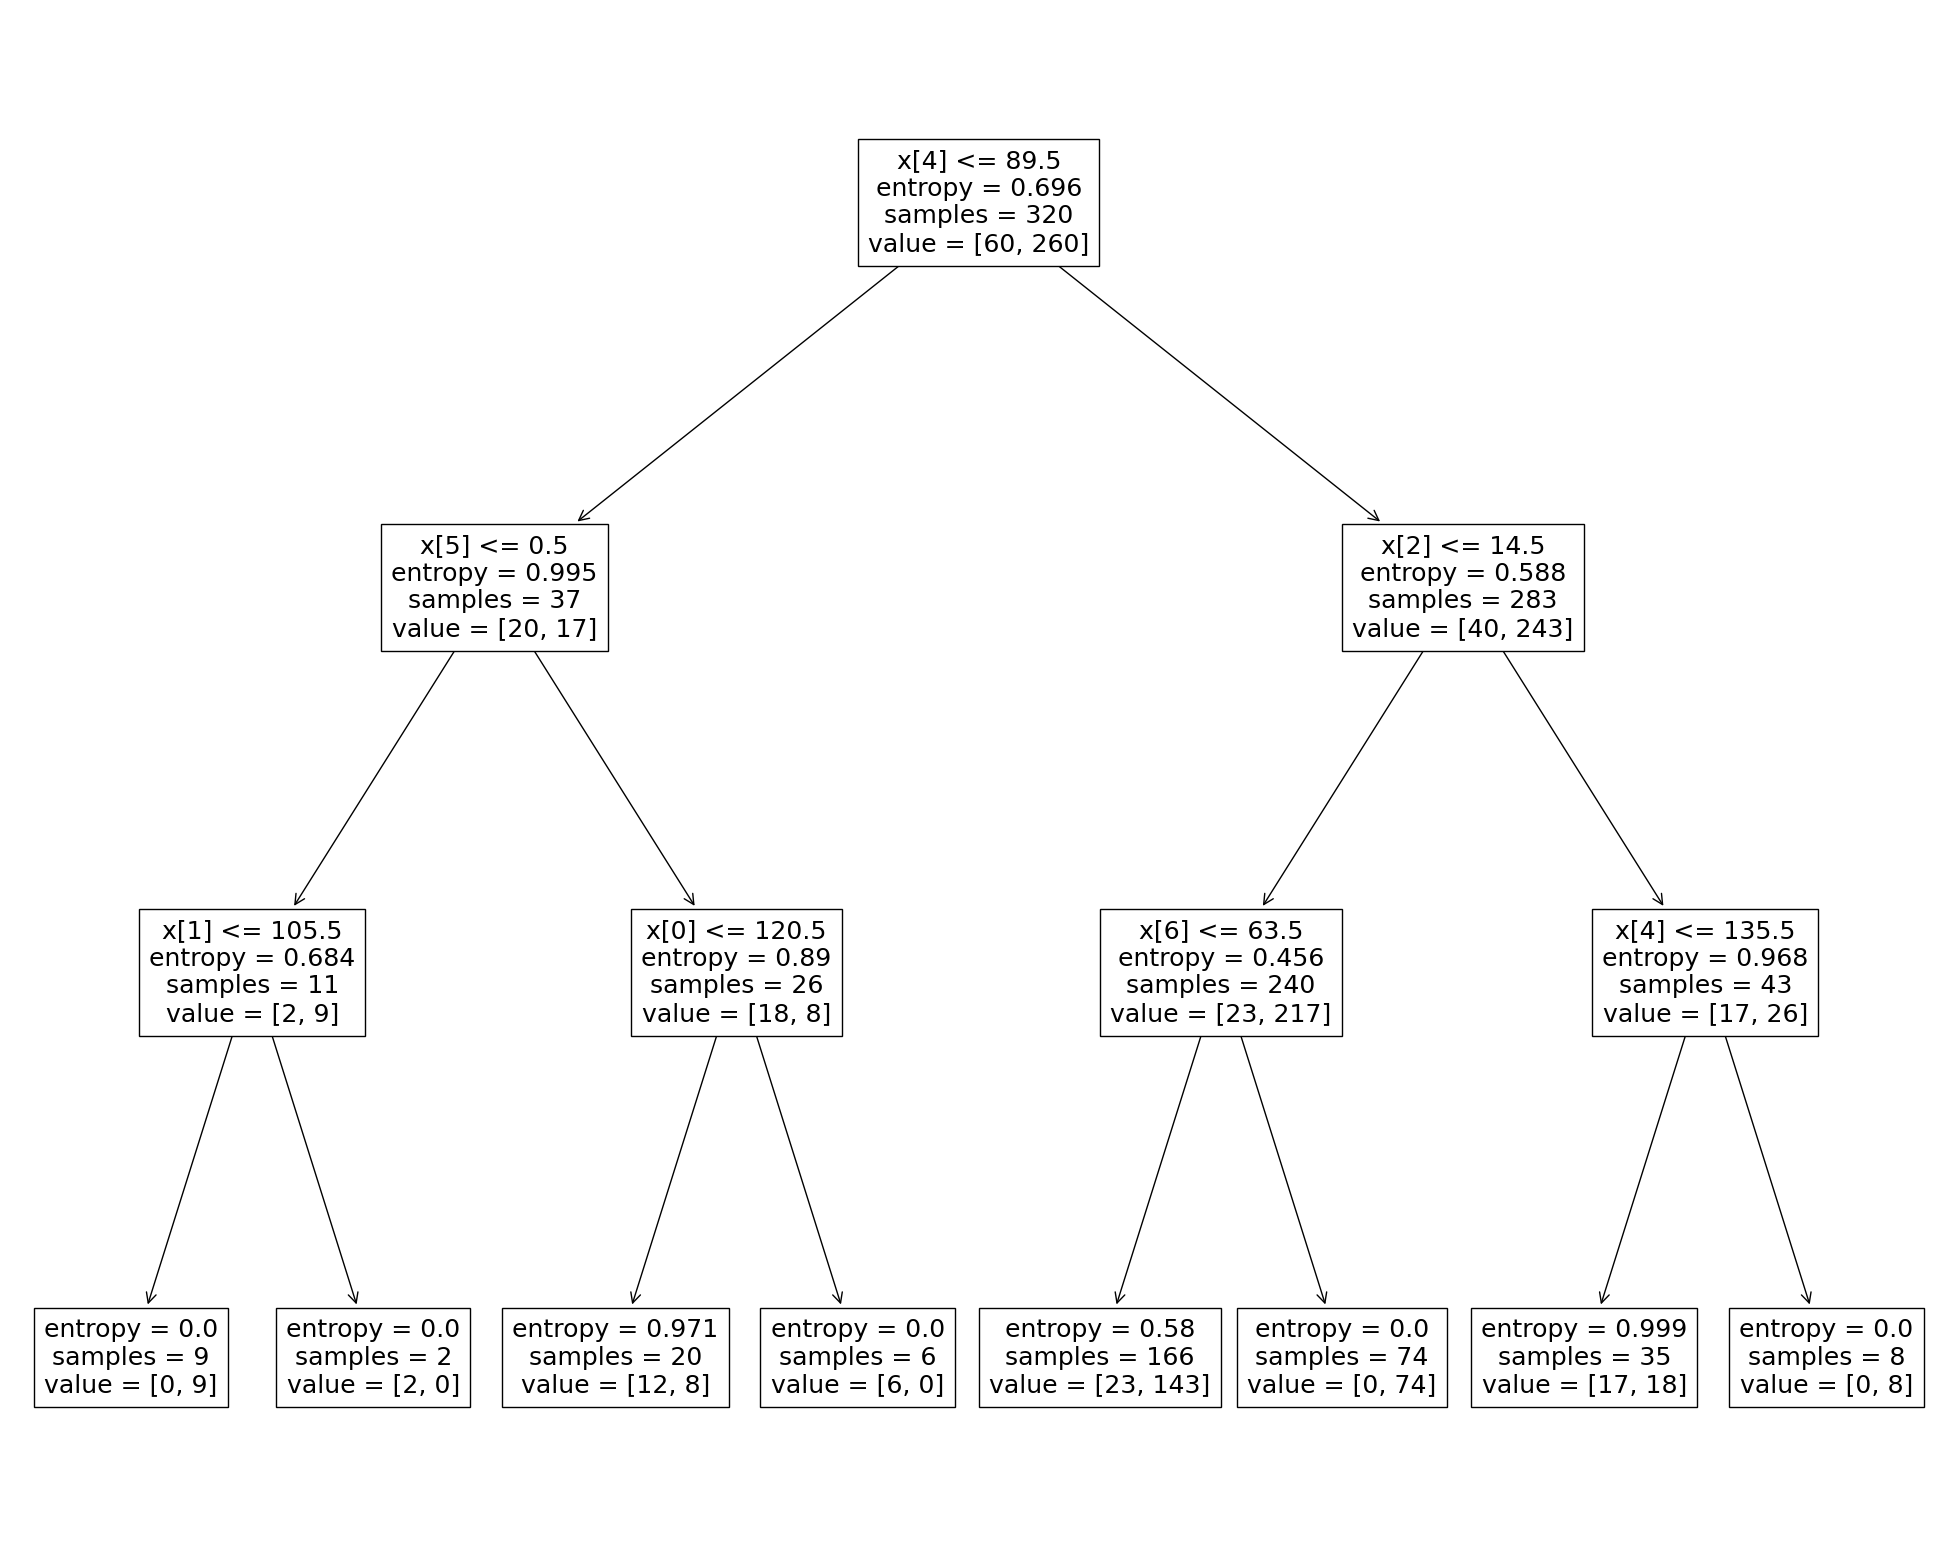

In [53]:
# Decision Tree Classifier using Entropy Criteria
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model)

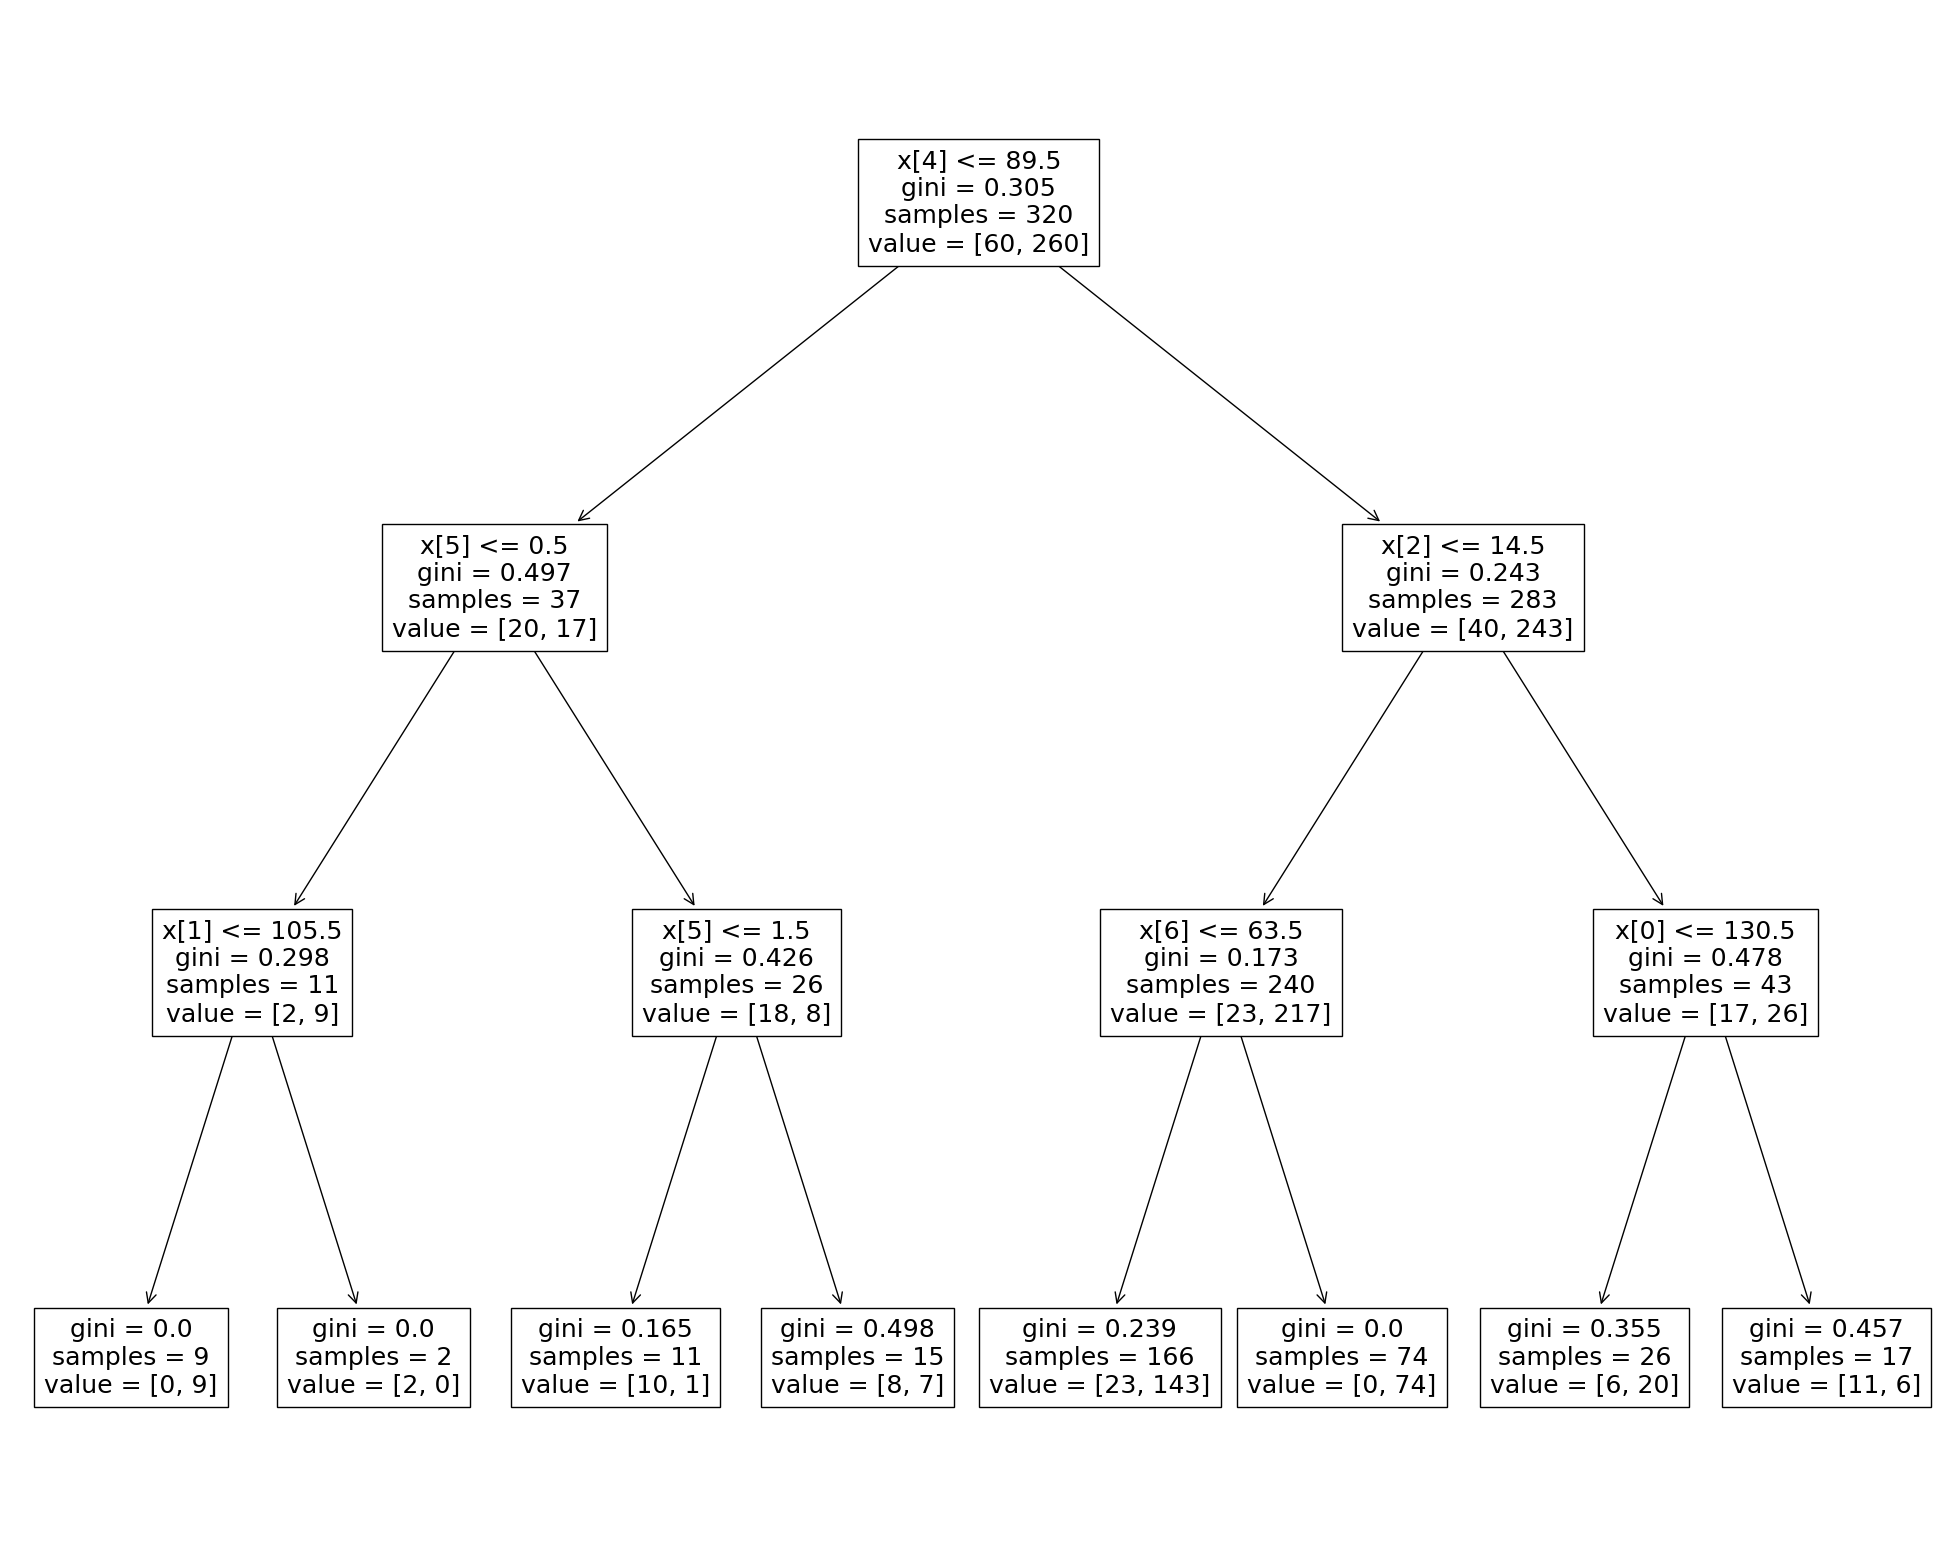

In [54]:
# Decision Tree Classifier (CART) using Gini Criteria
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini)

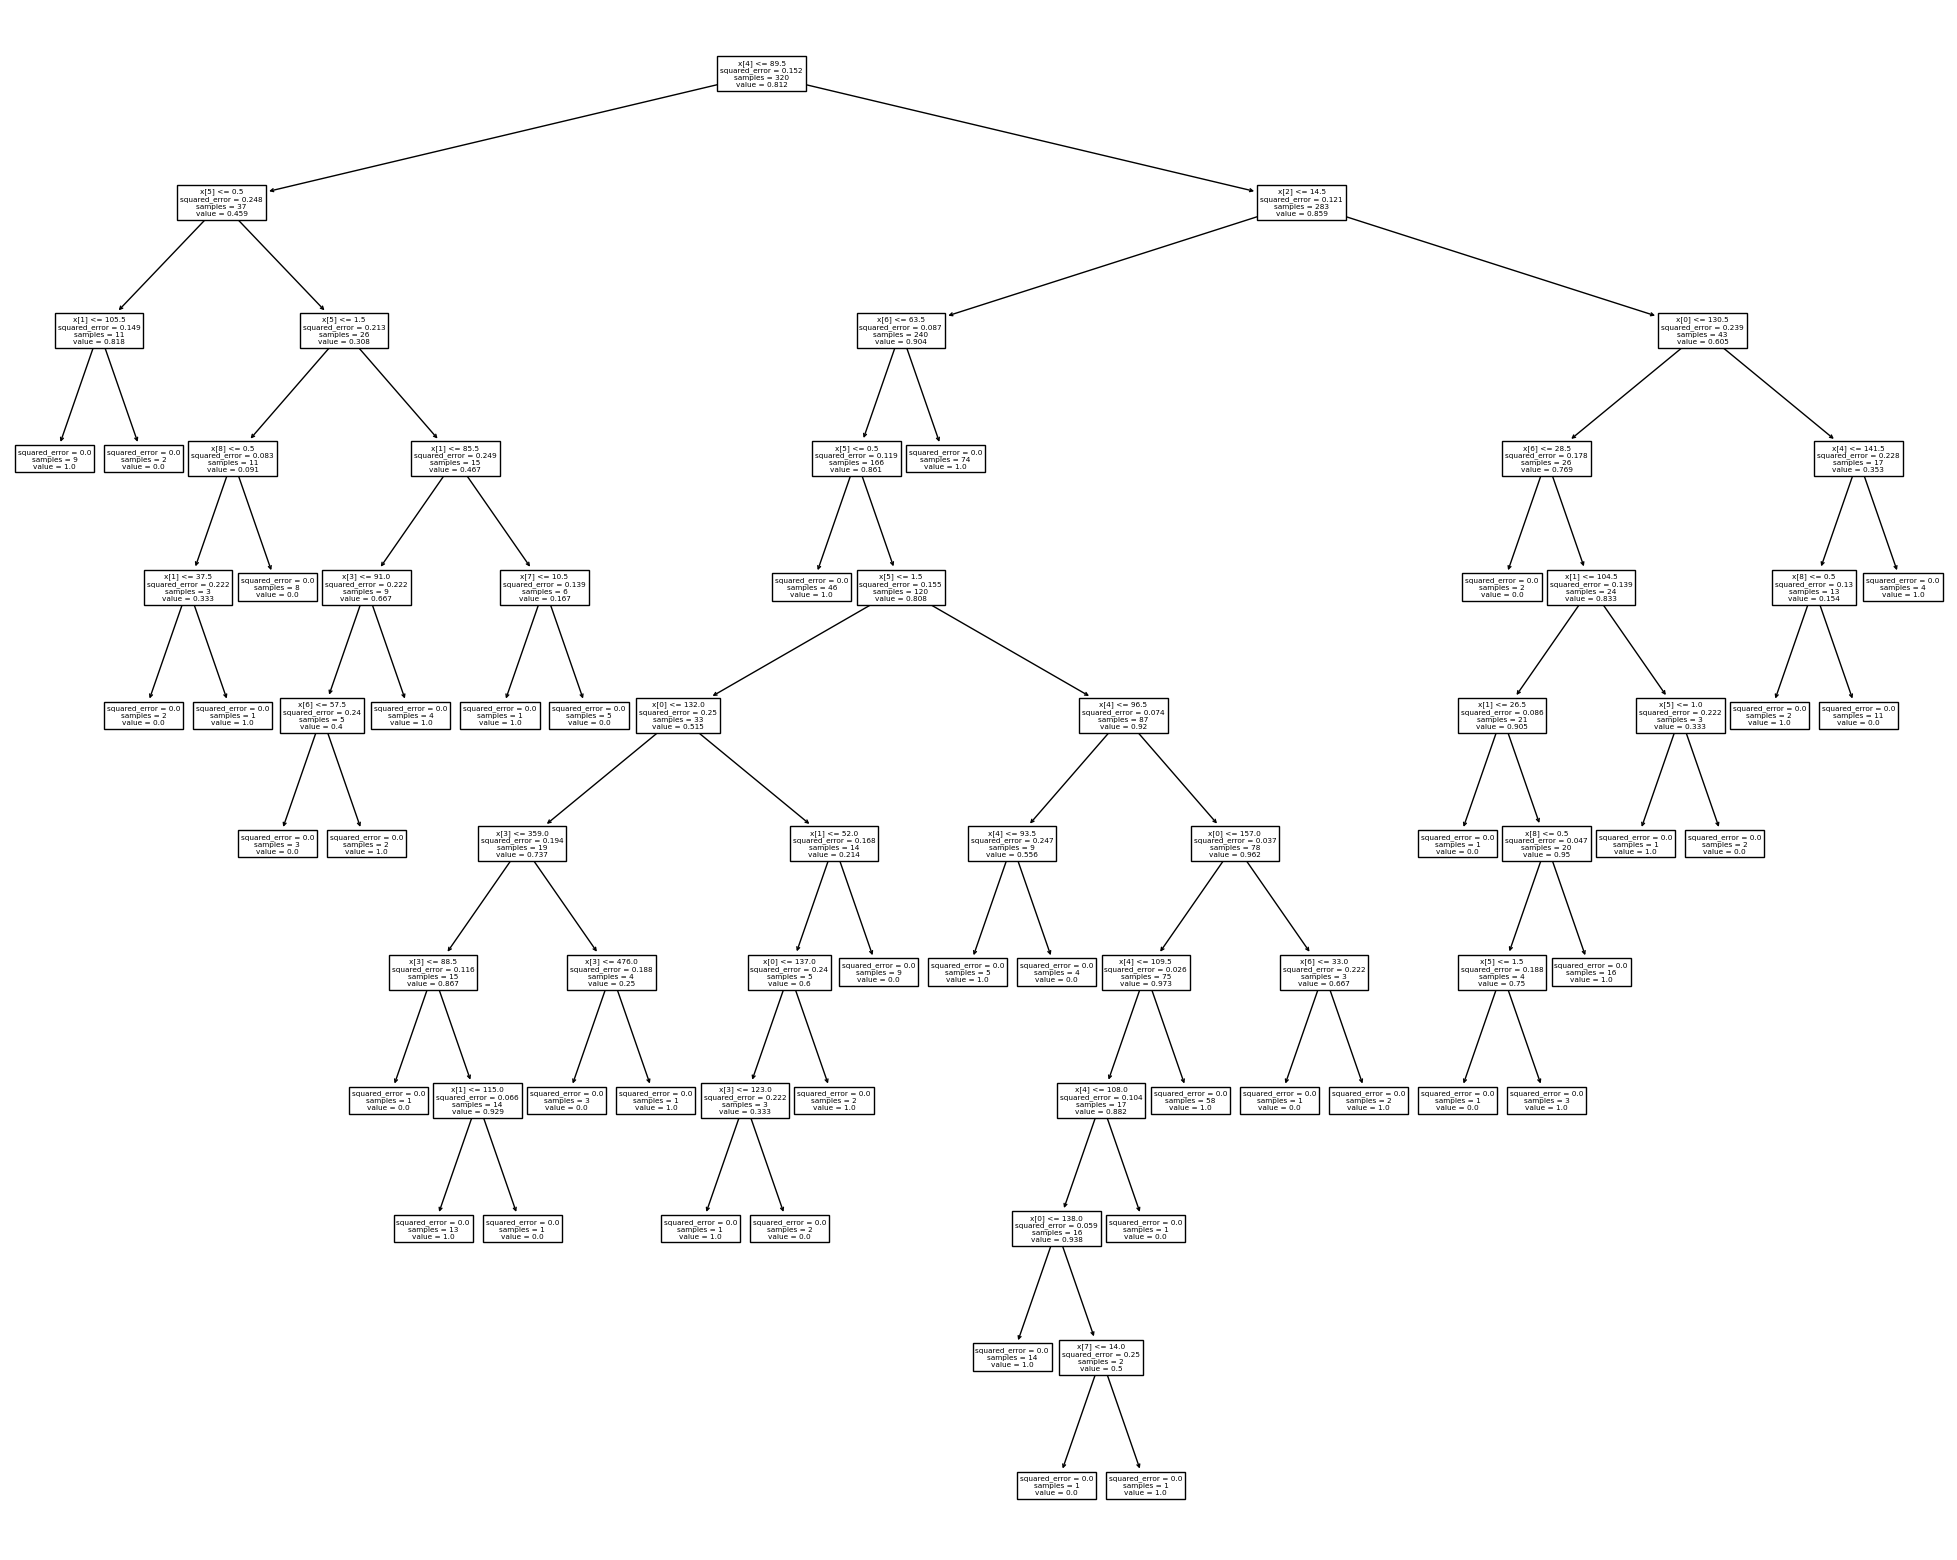

In [55]:
# Decision Tree Regression
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_R)